# Handling FITS files

The FITS (Flexible Image Transport System) standard is widely used in Astronomy for storing image data. It can also be used to store other structured data such as tables.

In this notebook we'll load a FITS file containing an image and accompanying data, take a look at the accompanying header information, plot the image, manipulate the data and save it back in to a new FITS file.

We'll be using the **Astropy** FITS sublibrary.

### Reading Data
First we load a few useful modules for plotting and manipulating data

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

We also need to import the `fits` methods from the astropy module 

In [2]:
from astropy.io import fits

Now we are ready to load some data. In the `data` folder inside the course directory there are some example FITS files. To load one of these in to Python we use the `open` function, and pass the location of the file we want as the first argument.

In [39]:
!ls ../data

3C_273-S-B-bcc2009.fits   502nmos_update.fits  demo.fits
3C_273-S-RI-bcc2009.fits  656nmos.fits	       MESSIER_051-I-103aE-dss1.fits
502nmos.fits		  673nmos.fits	       MESSIER_051-I-20cm-pkwb1984.fits


In [40]:
eagle_OIII = fits.open('../data/502nmos.fits')

If we call this variable on its own we can see that it's made up of two HDU (Header Data Unit) objects. A HDU is a high level FITS file component, typically containing data and an associated header.

In [41]:
eagle_OIII

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa120188940>, <astropy.io.fits.hdu.table.TableHDU object at 0x7fa12017b9e8>]

To access each HDU, just use python's zero based indexing.

In [42]:
eagle_OIII[0]

For more detailed information about each HDU we can call the `info` function.

In [43]:
eagle_OIII.info()

Filename: ../data/502nmos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     290   (1600, 1600)   float32   
  1  502nmos_cvt.tab    1 TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


There are also 'convenience' functions that allow you to access the data or headers directly. These can be useful when doing interactive Python sessions, but are inefficient in terms of performance compared to the approach shown above using `open`. Throughout this course we will use the more verbose approach for clarity and performance.

### Headers
Each HDU has its own header file. The header provides detailed information about the HDU. To view it, first subset by the HDU you want, then call the `header` function. Below, we display the header for both the image and the table in our chosen FITS file.

In [44]:
eagle_OIII[0].header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 1600 /                                                
NAXIS2  =                 1600 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                 2112 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2005-07-01'         / Date FITS file was created                     
FILENAME= '502nmos_cvt.hhh'    / Original filename                              
ALLG-MAX=           0.000000

In [45]:
eagle_OIII[1].header

XTENSION= 'TABLE   '           / Ascii table extension                          
BITPIX  =                    8 / 8-bits per 'pixels'                            
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  796 / Number of characters per row                   
NAXIS2  =                    1 / The number of rows                             
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
TFIELDS =                   49 / Number of fields per row                       
EXTNAME = '502nmos_cvt.tab'    / Name of table                                  
                                                                                
TTYPE1  = 'CRVAL1  '           /                                                
TBCOL1  =                    1 /                                                
TFORM1  = 'D25.17  '        

There is a wealth of information within the header, from dates and authors to instruments and filters used.

We can save the header in to a variable, which we do below in to the imaginatively named `header`.

In [46]:
header = eagle_OIII[0].header

Individual header values can be accessed by name

In [47]:
header['INSTRUME']

'WFPC2'

Header entries can also have associated comments that provide further information on a given entry. To access and modify these, use the comments function and pass the name of the value as the argument.

In [48]:
header.comments['INSTRUME']

'instrument in use'

To add a new value to the header specify the new keyword and assign the desired value.

In [49]:
header['MODIFIED'] = '6 Mar 2016'

To remove a header value, use the `remove` function and pass the name of the value you wish to remove

In [50]:
header.remove('HISTORY')

Remember that none of these changes will affect the original file until they are saved. We will cover this later in this notebook.

Some of the most common FITS file header keywords are shown below. Read [here](http://heasarc.gsfc.nasa.gov/docs/fcg/standard_dict.html) for more information on the FITS file standard keywords


| Keyword |	Description |
|------|------|
| SIMPLE |	If true (T) the file conforms to the FITS file standard. If false (F) the file does not conform. Needs to be the first keyword in a FITS file |
| BITPIX |	Specifies the size of the data type |
| XTENSION | If the header is an extension, this keyword specifies its type |
| NAXIS |	Number of axes |
| NAXISn |	Length of each axis |
| TFIELDS |	Number of fields in a Table |
| TFORMn |	Format of data in  column n of a Table |
| BSCALE |	Scaling factor to convert data points to true physical values |
| BZERO	| Zero point in the scaling equation |
| TSCALEn |	Scaling factor to convert Table values to true physical values |
| TZEROn |	Zero point in scaling equation for Tables |

### Image Data


Accessing image and table data is a simple as accessing the header. Just use the `data` function on an image HDU. This returns a numpy array, so we can use all of the typical numpy functions to investigate and manipulate the array.

In [51]:
data = eagle_OIII[0].data

In [52]:
data.shape

(1600, 1600)

In [53]:
data.dtype.name

'float32'

In [54]:
print( 'Min:', np.min(data))
print( 'Max:', np.max(data))
print('Mean:', np.mean(data))
print( 'Stdev:', np.std(data))

Min: -12.439324
Max: 2925.8718
Mean: 6.237272
Stdev: 15.768199


We can view the image with a simple call to `pyplot`

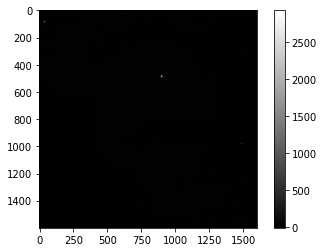

In [55]:
plt.imshow(data, cmap='gray')
plt.colorbar()

Not particularly interesting. We can plot a histogrm of the data to get a better idea of what is going on.

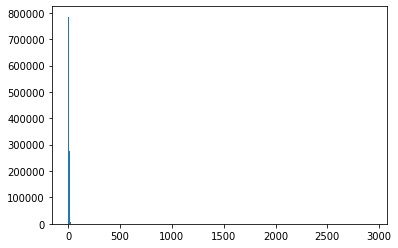

In [56]:
histogram = plt.hist(data.flat, bins=1000)

Almost all of the pixels have values below $10^{-15}$. In fact, there's a foreground star producing a pixel count far greater than the background image, so it doesn't appear on this linear scale. Let's adjust the scale so that we can see the features better

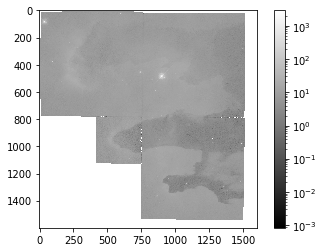

In [57]:
from matplotlib.colors import LogNorm
plt.imshow(data, cmap='gray', norm=LogNorm())
plt.colorbar()

We can now pick out the pillars of the Eagle nebula. We could also set a maximum pixel count limit using the vmax argument to limit the high values associated with the foreground star.

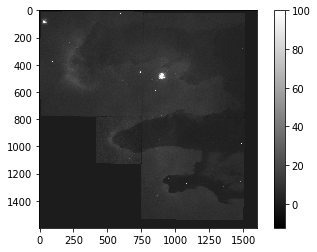

In [58]:
plt.imshow(data, cmap='gray', vmax=100)
plt.colorbar()